# Analyzing the data containing power for multiple ACs at some hotel in Gurgaon


### Problem Statement:

    1.Identify patterns/trends in the data?
    2.Which AC was used the most/least?
    3.Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?
    4.Using the power data, predict/forecast the power consumption?


In [52]:
#Loading the libraires
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)


In [2]:
AC_data = pd.read_csv('AC_Data.csv')

In [3]:
AC_data.head()                 #checking the first 5 rows of data

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [4]:
AC_data.shape                 #checking the shape

(87840, 19)

In [5]:
AC_data.isnull().sum()            #checking for null values

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

In [6]:
AC_data.describe()                       #checking for descriptive statistics of the data

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,43708.000000,43711.000000,43713.000000,43704.000000,43716.000000,43717.000000,43679.000000,43704.000000,43654.000000,43690.000000,43670.000000,43713.000000,43719.000000,43696.000000,43715.000000,43710.000000,43714.000000,43723.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676
std,2.276782,2.545147,1.487508,1.797529,0.767218,1.655560,1.473498,1.504482,1.522291,0.685461,1.554481,1.436087,1.847168,1.454946,2.016898,1.606239,1.125491,2.319242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.123263,1.706508,1.258299,0.970744,1.543779,2.190803,1.766230,2.294635,1.117139,1.591748,1.949729,3.260674,1.852981,3.023501,1.877626,3.752478,4.013579
50%,2.094330,3.791752,2.486992,2.308961,1.380183,2.665063,3.005071,2.608551,3.082134,1.504554,2.351361,2.727152,4.217381,2.787084,4.001279,2.673698,4.611434,7.131194
75%,3.661752,5.460892,3.441527,3.476123,1.870234,3.616988,3.897857,3.496358,4.096374,1.963707,3.254937,3.566744,5.379832,3.824467,5.260193,3.695294,4.958306,8.314639
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


<AxesSubplot:>

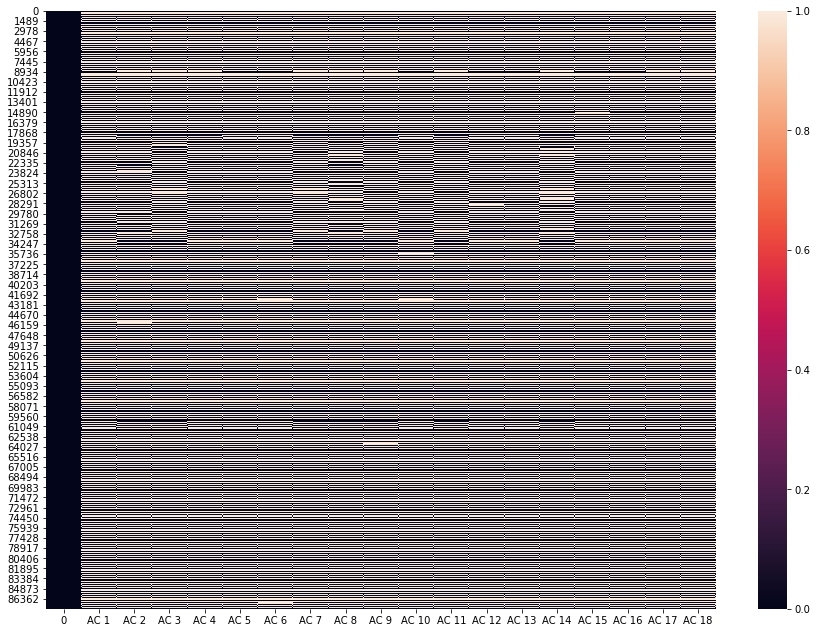

In [7]:
plt.figure(figsize=(15,11))
                                                        #checking for Null values by graph
sns.heatmap(AC_data.isnull())

After perfroming basic analysis there are approx 44117 data is missing in every column,so we do not drop na vallues now  and also the information which is more important for the tasks to perfrom i.e temprature data we have collect the temprature data and merge with this data.


### 3.Fetching the temperature of Gurgaon
#### Web Scrapping part
      For collecting temprature data I have use some modules for scapping data from online.  
      I use the world weather online website from scarpping the data by using API key.    

In [8]:
!pip install wwo_hist

In [9]:
from wwo_hist import retrieve_hist_data
import os
desktop = os.path.expanduser("/Zentaix")

In [10]:
frequency=3
start_date = '1-AUG-2019'
end_date = '30-SEPT-2019'
api_key = '0d1a014a55a947af9af150632221501'
location_list = ['Gurgaon']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Gurgaon


Currently retrieving data for Gurgaon: from 2019-08-01 to 2019-08-31
Time elapsed (hh:mm:ss.ms) 0:00:01.394777
Currently retrieving data for Gurgaon: from 2019-09-01 to 2019-09-30
Time elapsed (hh:mm:ss.ms) 0:00:02.747742


export Gurgaon completed!




## After collecting the data from the website

First task is to merege the Gurgoan_data with AC_data so that we can perfrom more Anlysis.

After collecting the data of temprature I got every 3 hours data but in Ac Data there are every minute data so for that I take constant temprature value for every 3 hours i.e for 180 minutes the temprature will be same after that it will change after every next 3 hours accordingly (Eg: If 12 A.M the temprature is 31 then it will be same for the next 3 hours i.e for 1 AM and 2AM ).
And for the missing values I assumed that may be that time no power has been consumed by AC


### Code for clealing and merging two dataset 
     #df = pd.read_csv('Gurgaon1.csv')
     #gur_time = pd.to_datetime(df["date_time"])
     #df2 = pd.read_csv('AC_Data.csv')
     #ac_time = pd.to_datetime(df2['0'])
     #df['date_time'][0]

    #j = 0
    #temp = []
    #for i in range(len(ac_time)):
      #if(j!=len(gur_time)):
         #if(ac_time[i]==gur_time[j]):
           # j = j+1
      #temp.append(df['tempC'][j-1])
  
    #len(temp), len(df2)
    #df2['tempC'] = temp
    #df2.to_csv('AC_temp_data_1.csv',index=False)

In [11]:
df = AC_data

In [12]:
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [13]:
df1=pd.read_csv("AC_temp_data_1.csv",parse_dates=['0'])

In [14]:
df1.head()

,0,tempC,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,31,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,31,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,31,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [15]:
df1.rename(columns ={"0":"Date"},inplace = True)

In [16]:
df1.head()

,Date,tempC,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,31,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,31,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,31,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [17]:
df1.set_index("Date",inplace=True)

## Checking for missing values
     Here we will check the percentage of nan values present in each feature
     and make the list of features which has missing values


In [20]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

AC 1 0.5024  % missing values
AC 2 0.5024  % missing values
AC 3 0.5024  % missing values
AC 4 0.5025  % missing values
AC 5 0.5023  % missing values
AC 6 0.5023  % missing values
AC 7 0.5027  % missing values
AC 8 0.5025  % missing values
AC 9 0.503  % missing values
AC 10 0.5026  % missing values
AC 11 0.5028  % missing values
AC 12 0.5024  % missing values
AC 13 0.5023  % missing values
AC 14 0.5026  % missing values
AC 15 0.5023  % missing values
AC 16 0.5024  % missing values
AC 17 0.5023  % missing values
AC 18 0.5022  % missing values


In [21]:
features_with_na

['AC 1',
 'AC 2',
 'AC 3',
 'AC 4',
 'AC 5',
 'AC 6',
 'AC 7',
 'AC 8',
 'AC 9',
 'AC 10',
 'AC 11',
 'AC 12',
 'AC 13',
 'AC 14',
 'AC 15',
 'AC 16',
 'AC 17',
 'AC 18']

In [23]:
df1.info()                     #checking for exact number of null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87840 entries, 2019-08-01 00:00:00 to 2019-09-30 23:59:00
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tempC   87840 non-null  int64  
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), int64(1)
memory usage: 13.4 MB


Since they are many missing values, we need to find the relationship between missing values and temprature Let's plot some diagram for this relationship and find the pattern

In [54]:
#1. Finding patterns/trend

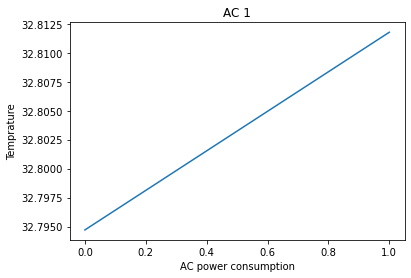

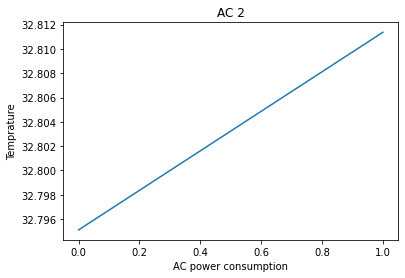

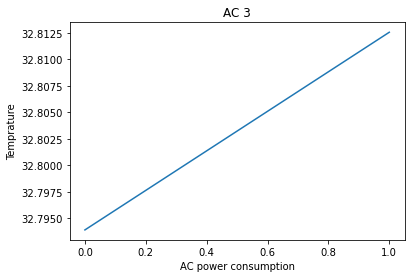

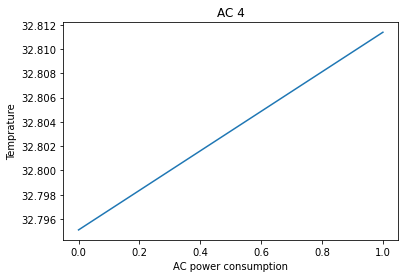

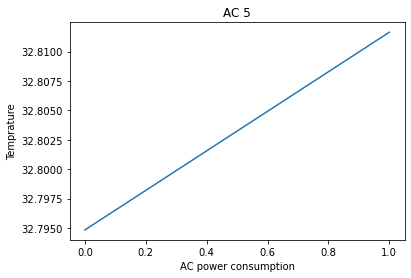

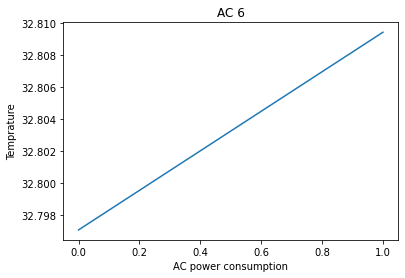

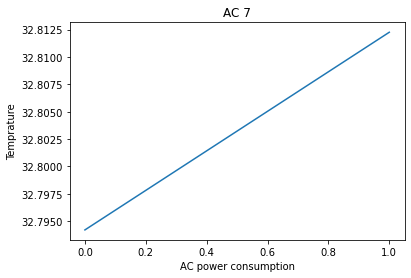

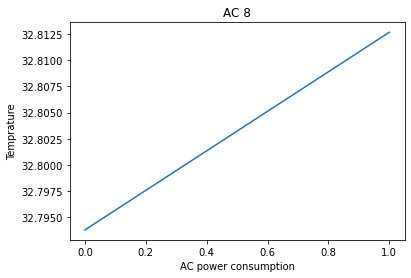

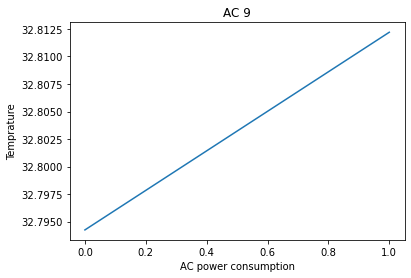

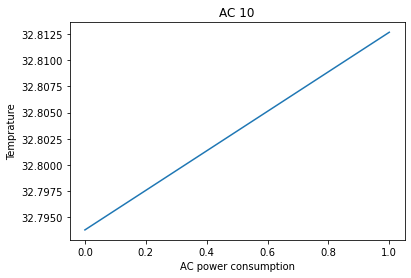

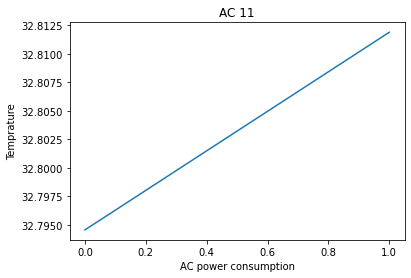

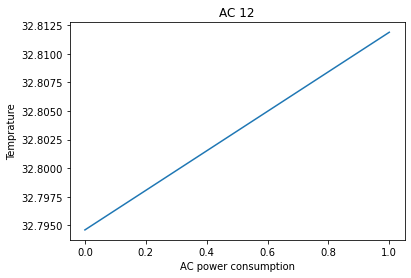

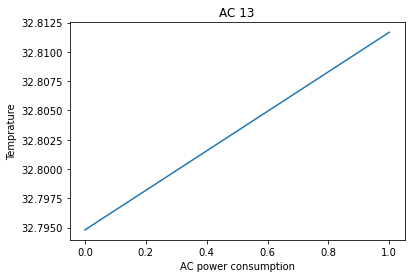

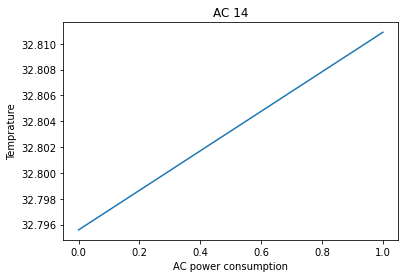

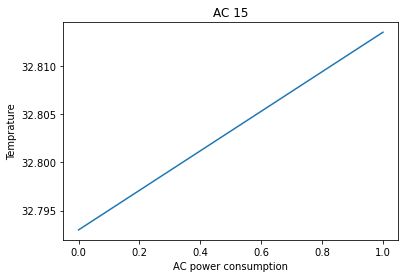

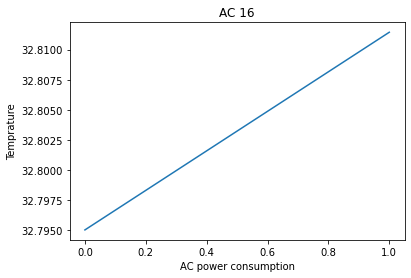

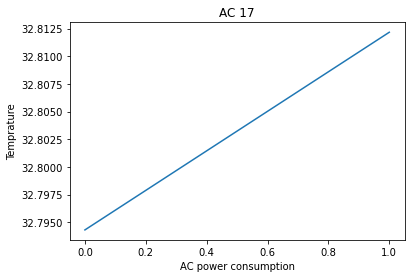

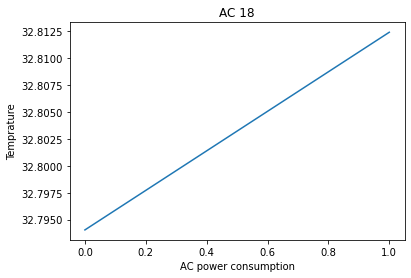

In [31]:
for feature in features_with_na:
    data = df1.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['tempC'].mean().plot()
    plt.ylabel('Temprature')
    plt.xlabel('AC power consumption')
    plt.title(feature)
    plt.show()

In [27]:
corr = df1.corr()

<AxesSubplot:>

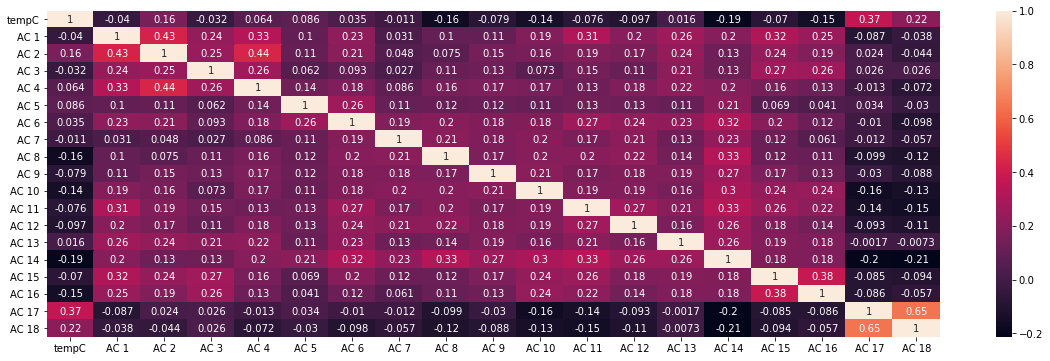

In [30]:
plt.figure(figsize=(20,6))
sns.heatmap(corr,annot= True)

 Clearly, there is an upward trend and a recurring event where temprature is high AC Power consumption also high.

There is a positive relationship between power Cosnumption and temperature. As temperature increases so does Power Cosnumption increases

<AxesSubplot:xlabel='Date'>

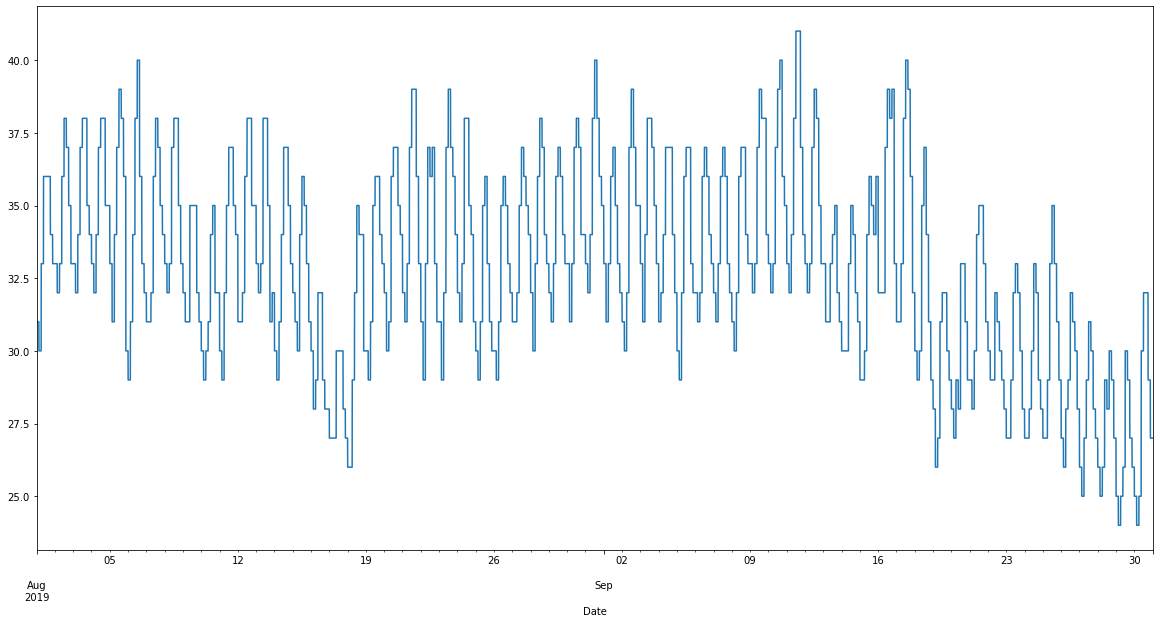

In [42]:
col='tempC'
df1[col].plot(kind='line',figsize=(20,10))

In [ ]:
#2.Which AC was used the most/least?

In [43]:
numbers={'AC1':'43708.000000','AC2':'43711.000000','AC3':'43713.000000','AC4':'43704.000000',
       'AC5':'43716.000000','AC6':'43717.000000','AC7':'43679.000000','AC8':'43704.000000',
      'AC9': '43654.000000','AC10':'43690.000000','AC11':'43670.000000','AC12':'43713.000000',
       'AC13':'43719.000000','AC14':'43696.000000','AC15':'43715.000000','AC16':'43710.000000',
       'AC17':'43714.000000','AC18':'43723.000000'}

In [44]:


Keymax = max(zip(numbers.values(), numbers.keys(),))
print("The AC used most",Keymax)

Keymin = min(zip(numbers.values(), numbers.keys(),))
print("The AC used least",Keymin)



The AC used most ('43723.000000', 'AC18')
The AC used least ('43654.000000', 'AC9')


In [55]:
#4.Using the power data, predict/forecast the power consumption?

Text(0.5, 1.0, 'Forecasts for power consumption')

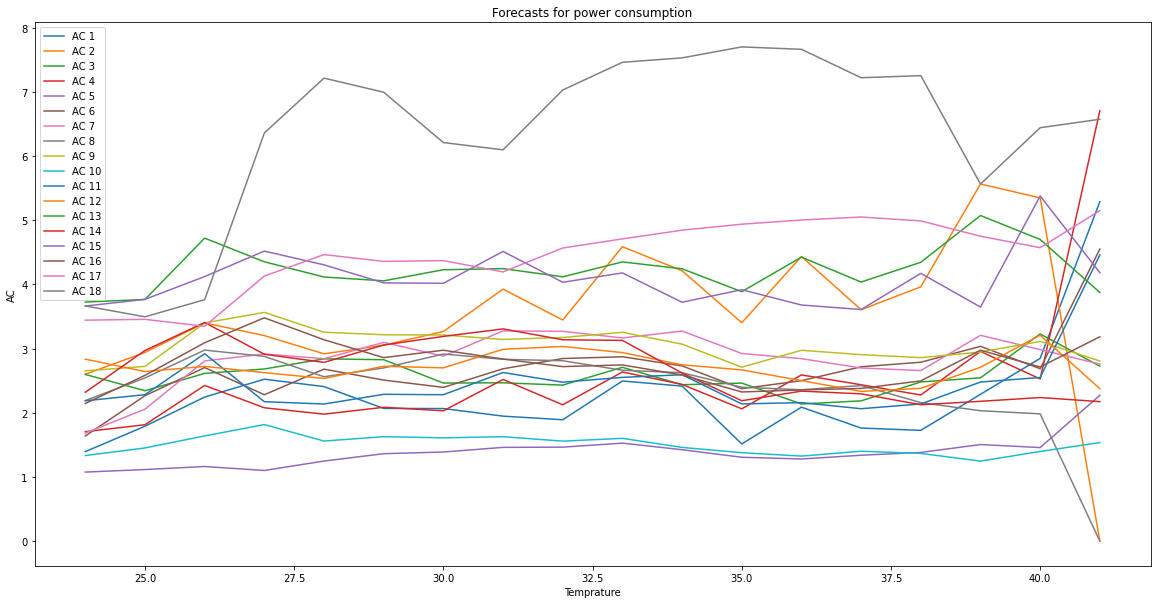

In [45]:
a=['AC 1','AC 2','AC 3','AC 4','AC 5','AC 6','AC 7',
   'AC 8','AC 9','AC 10','AC 11','AC 12','AC 13',
   'AC 14','AC 15','AC 16','AC 17','AC 18']

df1.groupby('tempC')[a].median().plot(figsize=(20,10))
plt.xlabel('Temprature')
plt.ylabel('AC')
plt.title("Forecasts for power consumption")

<Figure size 1440x720 with 0 Axes>

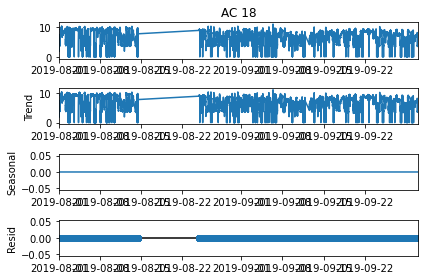

<Figure size 1440x720 with 0 Axes>

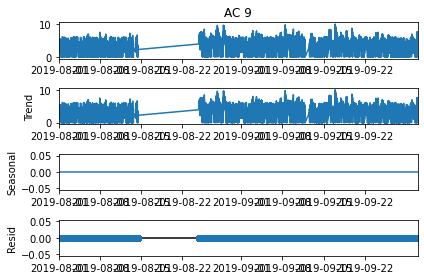

<Figure size 2880x1440 with 0 Axes>

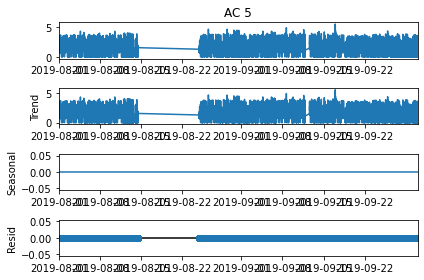

<Figure size 1440x720 with 0 Axes>

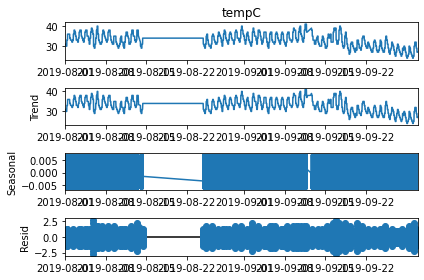

In [51]:
#for seasonal decompose we have to remove the NA values
df1=df1.dropna()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['AC 18'],model='additive',period=1)
plt.figure(figsize=(20,10))
result.plot()
plt.show()

result = seasonal_decompose(df1['AC 9'],model='additive',period=1)
plt.figure(figsize=(20,10))
result.plot()
plt.show()

result = seasonal_decompose(df1['AC 5'],model='additive',period=1)
plt.figure(figsize=(40,20))
result.plot()
plt.show()

result = seasonal_decompose(df1['tempC'],model='additive',period=11)
plt.figure(figsize=(20,10))
result.plot()
plt.show()